In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

%matplotlib inline 

In [3]:
df = pd.read_csv('copenhagen_data.csv')

In [4]:
df.head()

,municipality,municipality code,year,gender,age,ethnicity,education,income,income observations,weighted_inc_mun,days in hospital,days in hospital observations,weighted_hosp_days_mun,number of hospitalizations,number of hospitalizations observations,weighted_hospitalizations_mun
0,Denmark,0,2005,Men,18-29,Danish,Higher education,NaN,NaN,NaN,0.186,30425.0,0.001379,0.049,30425.0,0.000364
1,Denmark,0,2005,Men,18-29,Danish,No higher education,NaN,NaN,NaN,0.269,296267.0,0.019420,0.076,296267.0,0.005493
2,Denmark,0,2005,Men,18-29,Immigrants and descendants,Higher education,NaN,NaN,NaN,0.159,1925.0,0.000075,0.047,1925.0,0.000022
3,Denmark,0,2005,Men,18-29,Immigrants and descendants,No higher education,NaN,NaN,NaN,0.256,26048.0,0.001625,0.078,26048.0,0.000496
4,Denmark,0,2005,Men,18-29,Non-western immigrants and descendants,Higher education,NaN,NaN,NaN,0.155,1096.0,0.000041,0.047,1096.0,0.000013


In [5]:
# Perform one-hot encoding on the 'gender' column
one_hot_encoded_gender = pd.get_dummies(df.gender, prefix='gender')

# Concatenate the one-hot encoded columns to the original DataFrame
df_gender = pd.concat([df.drop('gender', axis=1), one_hot_encoded_gender], axis=1)
df_gender


,municipality,municipality code,year,age,ethnicity,education,income,income observations,weighted_inc_mun,days in hospital,days in hospital observations,weighted_hosp_days_mun,number of hospitalizations,number of hospitalizations observations,weighted_hospitalizations_mun,gender_Men,gender_Women
0,Denmark,0,2005,18-29,Danish,Higher education,NaN,NaN,NaN,0.186,30425.0,0.001379,0.049,30425.0,0.000364,1,0
1,Denmark,0,2005,18-29,Danish,No higher education,NaN,NaN,NaN,0.269,296267.0,0.019420,0.076,296267.0,0.005493,1,0
2,Denmark,0,2005,18-29,Immigrants and descendants,Higher education,NaN,NaN,NaN,0.159,1925.0,0.000075,0.047,1925.0,0.000022,1,0
3,Denmark,0,2005,18-29,Immigrants and descendants,No higher education,NaN,NaN,NaN,0.256,26048.0,0.001625,0.078,26048.0,0.000496,1,0
4,Denmark,0,2005,18-29,Non-western immigrants and descendants,Higher education,NaN,NaN,NaN,0.155,1096.0,0.000041,0.047,1096.0,0.000013,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39600,Greater Copenhagen,1,2020,60-65,Danish,No higher education,327995.938342,19143.0,9789.862554,NaN,NaN,NaN,NaN,NaN,NaN,0,1
39601,Greater Copenhagen,1,2020,60-65,Immigrants and descendants,Higher education,360832.894995,1075.0,604.801301,NaN,NaN,NaN,NaN,NaN,NaN,0,1
39602,Greater Copenhagen,1,2020,60-65,Immigrants and descendants,No higher education,233379.566602,2257.0,821.282403,NaN,NaN,NaN,NaN,NaN,NaN,0,1
39603,Greater Copenhagen,1,2020,60-65,Non-western immigrants and descendants,Higher education,258666.804848,369.0,148.821334,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [6]:
women_dk = df[(df.gender == 'Women') & (df.municipality == 'Denmark')]
women_cph = df[(df.gender == 'Women') & (df.municipality == 'Greater Copenhagen')]

In [7]:
women_cph.isnull().sum()

municipality                                 0
municipality code                            0
year                                         0
gender                                       0
age                                          0
ethnicity                                    0
education                                    0
income                                      84
income observations                         84
weighted_inc_mun                            84
days in hospital                           480
days in hospital observations              480
weighted_hosp_days_mun                     480
number of hospitalizations                 480
number of hospitalizations observations    480
weighted_hospitalizations_mun              480
dtype: int64

In [8]:
women_dk.isnull().sum()

municipality                                 0
municipality code                            0
year                                         0
gender                                       0
age                                          0
ethnicity                                    0
education                                    0
income                                      84
income observations                         84
weighted_inc_mun                            84
days in hospital                           480
days in hospital observations              480
weighted_hosp_days_mun                     480
number of hospitalizations                 480
number of hospitalizations observations    480
weighted_hospitalizations_mun              480
dtype: int64

In [9]:
women_dk.describe()

,municipality code,year,income,income observations,weighted_inc_mun,days in hospital,days in hospital observations,weighted_hosp_days_mun,number of hospitalizations,number of hospitalizations observations,weighted_hospitalizations_mun
count,900.0,900.000000,816.000000,816.000000,816.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,0.0,2004.246667,231148.001544,50582.045343,5242.652856,0.688081,73545.061905,0.016225,0.175255,73545.061905,0.003613
std,0.0,9.711021,54344.204847,75442.268114,7776.173635,0.523846,115823.896253,0.047336,0.076952,115823.896253,0.008649
min,0.0,1987.000000,132744.213000,95.000000,10.842936,0.146000,739.000000,0.000136,0.064000,739.000000,0.000046
25%,0.0,1996.000000,187093.794000,3094.000000,273.547178,0.360750,6866.750000,0.000811,0.124750,6866.750000,0.000226
50%,0.0,2005.000000,223897.277000,8358.500000,754.998928,0.487000,15870.500000,0.001970,0.153000,15870.500000,0.000608
75%,0.0,2013.000000,262636.062750,92572.500000,10046.301530,0.733500,119248.000000,0.011903,0.184000,119248.000000,0.003465
max,0.0,2020.000000,432689.526000,271526.000000,28641.438926,2.549000,566835.000000,0.293683,0.408000,566835.000000,0.051088


In [10]:
women_cph.describe()

,municipality code,year,income,income observations,weighted_inc_mun,days in hospital,days in hospital observations,weighted_hosp_days_mun,number of hospitalizations,number of hospitalizations observations,weighted_hospitalizations_mun
count,900.0,900.000000,816.000000,816.000000,816.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,1.0,2004.246667,227421.468557,12102.427696,5495.549291,0.748357,18396.780952,0.016753,0.187238,18396.780952,0.003720
std,0.0,9.711021,73910.812681,16153.552222,7530.139170,0.649131,23544.299073,0.046669,0.092704,23544.299073,0.007929
min,1.0,1987.000000,0.000000,0.000000,0.000000,0.142508,189.000000,0.000116,0.070749,189.000000,0.000040
25%,1.0,1996.000000,183312.118565,934.250000,362.998452,0.349352,2943.250000,0.001316,0.127060,2943.250000,0.000420
50%,1.0,2005.000000,219904.990893,3262.000000,1232.432108,0.496680,6892.000000,0.003411,0.159697,6892.000000,0.001144
75%,1.0,2013.000000,269361.221787,22497.750000,10117.321605,0.756136,29409.000000,0.013196,0.200414,29409.000000,0.003842
max,1.0,2020.000000,481647.943619,58907.000000,27843.156313,3.033039,104615.000000,0.304670,0.505179,104615.000000,0.046701


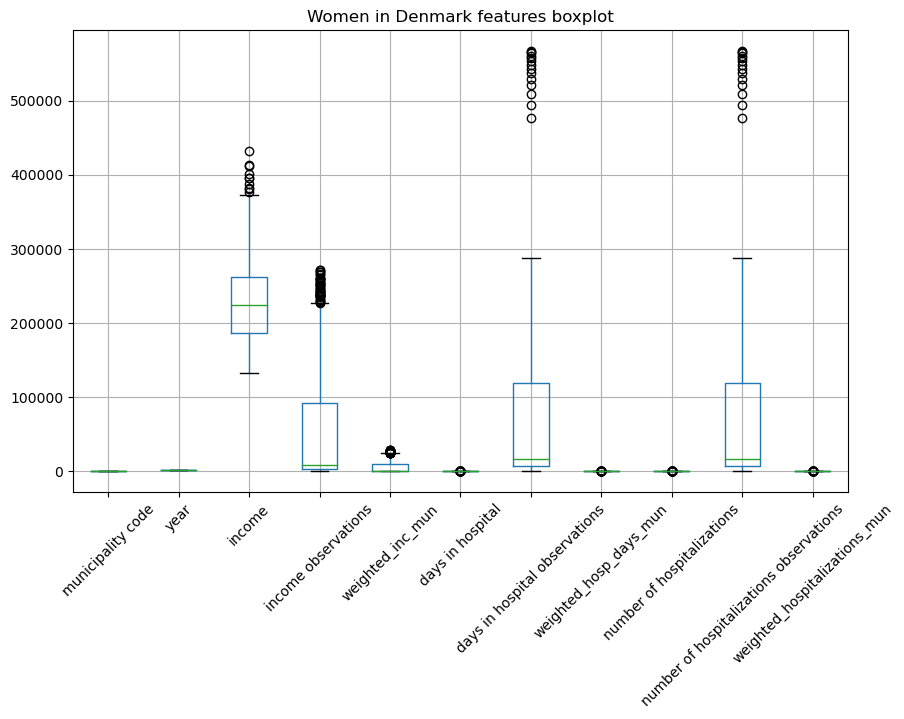

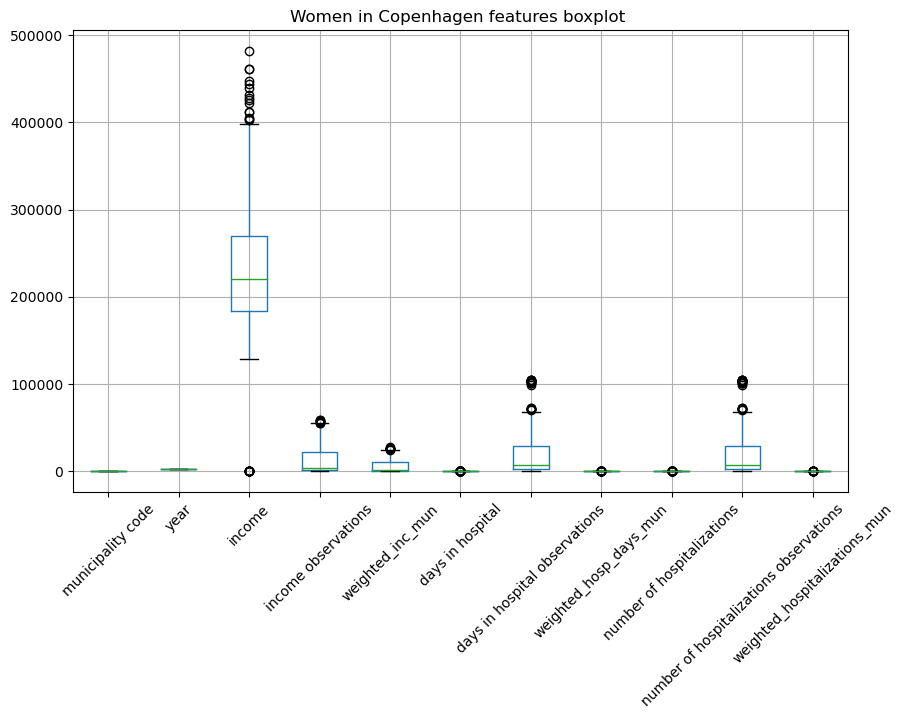

In [11]:
plt.figure(figsize= (10,6))
women_dk.boxplot()
plt.xticks(rotation=45)
plt.title('Women in Denmark features boxplot')
plt.show()

plt.figure(figsize= (10,6))
women_cph.boxplot()
plt.xticks(rotation=45)
plt.title('Women in Copenhagen features boxplot ')
plt.show()

In [12]:
women_dk_drop = women_dk.dropna()
women_cph_drop = women_cph.dropna()

In [13]:
df_2= df.dropna()
df_dk = df_2[df_2.municipality == 'Denmark']
df_cph = df_2[df_2.municipality == 'Greater Copenhagen']
df_dk
# df2

,municipality,municipality code,year,gender,age,ethnicity,education,income,income observations,weighted_inc_mun,days in hospital,days in hospital observations,weighted_hosp_days_mun,number of hospitalizations,number of hospitalizations observations,weighted_hospitalizations_mun
6,Denmark,0,2005,Men,30-39,Danish,Higher education,271510.362,98566.0,10707.481497,0.215,103551.0,0.005425,0.056,103551.0,0.001415
7,Denmark,0,2005,Men,30-39,Danish,No higher education,218419.246,229065.0,20018.126583,0.386,249125.0,0.023433,0.096,249125.0,0.005835
8,Denmark,0,2005,Men,30-39,Immigrants and descendants,Higher education,220190.110,5813.0,512.120219,0.202,6508.0,0.000320,0.062,6508.0,0.000098
9,Denmark,0,2005,Men,30-39,Immigrants and descendants,No higher education,169031.486,14256.0,964.137750,0.359,15981.0,0.001398,0.094,15981.0,0.000366
10,Denmark,0,2005,Men,30-39,Non-western immigrants and descendants,Higher education,190374.958,3201.0,243.819977,0.266,3532.0,0.000229,0.079,3532.0,0.000068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Denmark,0,2018,Women,60-65,Danish,No higher education,287411.536,118749.0,13983.567277,1.755,566835.0,0.215740,0.379,566835.0,0.046714
864,Denmark,0,2018,Women,60-65,Immigrants and descendants,Higher education,321121.430,3182.0,418.652110,1.109,9948.0,0.002393,0.260,9948.0,0.000562
865,Denmark,0,2018,Women,60-65,Immigrants and descendants,No higher education,221294.912,5924.0,537.118731,1.549,18113.0,0.006085,0.346,18113.0,0.001363
866,Denmark,0,2018,Women,60-65,Non-western immigrants and descendants,Higher education,261165.446,1252.0,133.968861,0.931,2768.0,0.000559,0.241,2768.0,0.000145


In [14]:
df2_dk_income_per_year = df_dk.groupby('year')['weighted_inc_mun'].sum().reset_index(name='count')
df2_cph_income_per_year = df_cph.groupby('year')['weighted_inc_mun'].sum().reset_index(name='count')

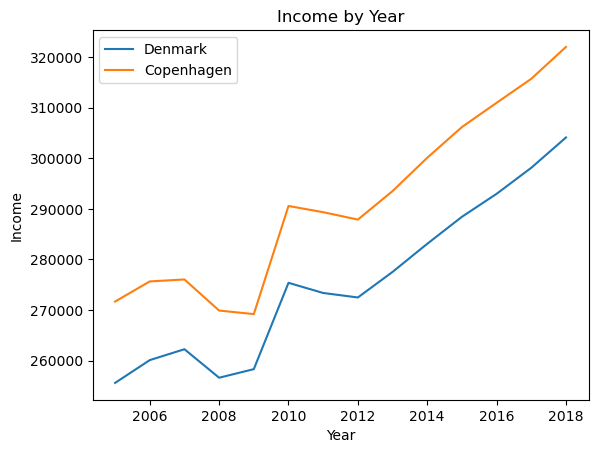

In [15]:
dk_income_per_year = df_dk.groupby('year')['weighted_inc_mun'].sum().reset_index(name='count')
cph_income_per_year = df_cph.groupby('year')['weighted_inc_mun'].sum().reset_index(name='count')

# Create a line plot with 'year' on the x-axis and 'income' on the y-axis
plt.plot(dk_income_per_year['year'], dk_income_per_year['count'], label='Denmark')
plt.plot(cph_income_per_year['year'], cph_income_per_year['count'], label='Copenhagen')

# Set the labels for the x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Income')

# Set the title for the plot
plt.title('Income by Year')

# Display the legend
plt.legend()

# Display the plot
plt.show()


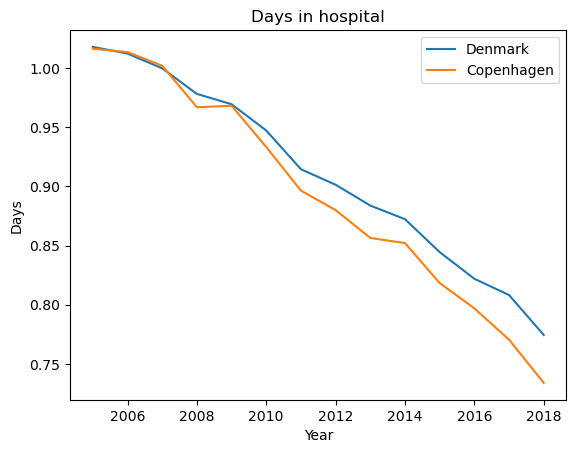

In [16]:
dk_hosp_days = df_dk.groupby('year')['weighted_hosp_days_mun'].sum().reset_index(name='count')
cph_hosp_days = df_cph.groupby('year')['weighted_hosp_days_mun'].sum().reset_index(name='count')

# Create a line plot with 'year' on the x-axis and 'income' on the y-axis
plt.plot(dk_hosp_days['year'], dk_hosp_days['count'], label='Denmark')
plt.plot(cph_hosp_days['year'], cph_hosp_days['count'], label='Copenhagen')

# Set the labels for the x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Days')

# Set the title for the plot
plt.title('Days in hospital')

# Display the legend
plt.legend()

# Display the plot
plt.show()

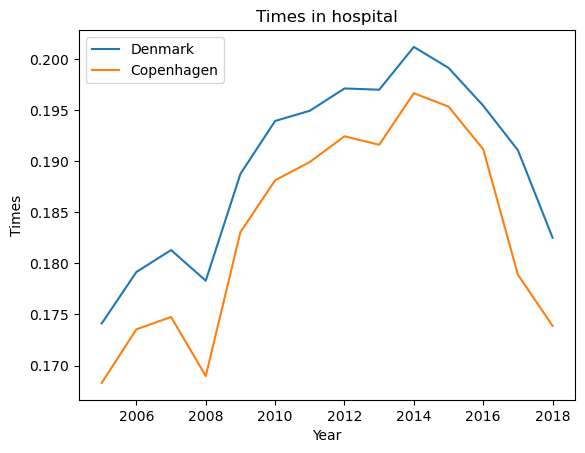

In [17]:
dk_hosp_times = df_dk.groupby('year')['weighted_hospitalizations_mun'].sum().reset_index(name='count')
cph_hosp_times = df_cph.groupby('year')['weighted_hospitalizations_mun'].sum().reset_index(name='count')

# Create a line plot with 'year' on the x-axis and 'income' on the y-axis
plt.plot(dk_hosp_times['year'], dk_hosp_times['count'], label='Denmark')
plt.plot(cph_hosp_times ['year'], cph_hosp_times ['count'], label='Copenhagen')

# Set the labels for the x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Times')

# Set the title for the plot
plt.title('Times in hospital')

# Display the legend
plt.legend()

# Display the plot
plt.show()

In [18]:
dk_income_per_year = df_dk.groupby('year')['weighted_inc_mun'].sum().reset_index(name='count')
cph_income_per_year = df_cph.groupby('year')['weighted_inc_mun'].sum().reset_index(name='count')

dk_income_per_year


,year,count
0,2005,255616.325266
1,2006,260120.765752
2,2007,262272.008722
3,2008,256640.596827
4,2009,258339.406989
5,2010,275387.016033
6,2011,273380.458131
7,2012,272492.815523
8,2013,277541.724643
9,2014,283093.914696


In [19]:
# import plotly.express as px
# import plotly.graph_objs as go

# Group the data by 'year' and 'municipality', then calculate the sum of 'weighted_inc_mun' for each group
df_income = df_2.groupby(['year', 'municipality'])['weighted_inc_mun'].sum().reset_index(name='count')

# Filter the data to only include the Greater Copenhagen and Denmark Municipality
selected_municipalities = ['Greater Copenhagen', 'Denmark']

# Create a line chart using Plotly Express, with 'year' on the x-axis, 'count' on the y-axis, and colored by 'municipality'
fig = px.line(df_income, x='year', y='count', color='municipality', markers=True)  # Adding markers to the line plot for better visibility of data points

# Set visibility to True only for the selected municipalities
for trace in fig.data:
    if trace.name in selected_municipalities:
        trace.visible = True
    else:
        trace.visible = 'legendonly'

# Edit the layout
fig.update_layout(title='Income by year per municiplaity',
                   xaxis_title='',
                   yaxis_title='Income')

fig.show()

In [20]:
# import plotly.express as px
# import plotly.graph_objs as go

# Group the data by 'year' and 'municipality', then calculate the sum of 'weighted_hosp_days_mun' for each group
df_hosp_days = df_2.groupby(['year', 'municipality'])['weighted_hosp_days_mun'].sum().reset_index(name='count')

# Filter the data to only include the Greater Copenhagen and Denmark Municipality
selected_municipalities = ['Greater Copenhagen', 'Denmark']

# Create a line chart using Plotly Express, with 'year' on the x-axis, 'count' on the y-axis, and colored by 'municipality'
fig = px.line(df_hosp_days, x='year', y='count', color='municipality', markers=True)  # Adding markers to the line plot for better visibility of data points

# Set visibility to True only for the selected municipalities
for trace in fig.data:
    if trace.name in selected_municipalities:
        trace.visible = True
    else:
        trace.visible = 'legendonly'

# Edit the layout
fig.update_layout(title='Days in hospitality',
                   xaxis_title='',
                   yaxis_title='Days')

fig.show()

In [21]:
# import plotly.express as px
# import plotly.graph_objs as go

# Group the data by 'year' and 'municipality', then calculate the sum of 'weighted_hospitalizations_mun' for each group
df_hosp_times = df_2.groupby(['year', 'municipality'])['weighted_hospitalizations_mun'].sum().reset_index(name='count')

# Filter the data to only include the Greater Copenhagen and Denmark Municipality
selected_municipalities = ['Greater Copenhagen', 'Denmark']

# Create a line chart using Plotly Express, with 'year' on the x-axis, 'count' on the y-axis, and colored by 'municipality'
fig = px.line(df_hosp_times, x='year', y='count', color='municipality', markers=True)  # Adding markers to the line plot for better visibility of data points

# Set visibility to True only for the selected municipalities
for trace in fig.data:
    if trace.name in selected_municipalities:
        trace.visible = True
    else:
        trace.visible = 'legendonly'

# Edit the layout
fig.update_layout(title='Hospitalization number per year',
                   xaxis_title='',
                   yaxis_title='Times')

fig.show()

In [22]:
# Group the data by 'year' and 'municipality', then calculate the sum of 'weighted_inc_mun' for each group
df_income_gender = df_2.groupby(['year', 'municipality', 'gender'])['weighted_inc_mun'].sum().reset_index(name='count')
df_income_gender

,year,municipality,gender,count
0,2005,Albertslund,Men,119553.848536
1,2005,Albertslund,Women,102671.814315
2,2005,Ballerup,Men,125782.092141
3,2005,Ballerup,Women,110185.593915
4,2005,Brøndby,Men,119157.083143
...,...,...,...,...
611,2018,Rødovre,Women,147938.697321
612,2018,Tårnby,Men,151469.501442
613,2018,Tårnby,Women,158572.911085
614,2018,Vallensbæk,Men,160330.548038


In [23]:
men_yearly_avg_inc = df_income_gender[df_income_gender.gender=='Men'].groupby('year')['count'].mean()
women_yearly_avg_inc = df_income_gender[df_income_gender.gender=='Women'].groupby('year')['count'].mean()

In [24]:
years = df_income_gender.year.unique()

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=men_yearly_avg_inc,
                name='Men',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=years,
                y=women_yearly_avg_inc,
                name='Women',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Annual gender income',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='DKK',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [25]:
import plotly.graph_objs as go

# Define years and initial municipality for the plot
years = df_income_gender.year.unique()
municipality = df_income_gender.municipality.unique()[0]

# Get the yearly average count for men and women for the initial municipality
men_yearly_avg_count = df_income_gender[(df_income_gender.gender=='Men') & (df_income_gender.municipality==municipality)].groupby('year')['count'].mean()
women_yearly_avg_count = df_income_gender[(df_income_gender.gender=='Women') & (df_income_gender.municipality==municipality)].groupby('year')['count'].mean()

# Create the initial plot
fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=men_yearly_avg_count,
                name='Men',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=years,
                y=women_yearly_avg_count,
                name='Women',
                marker_color='rgb(26, 118, 255)'
                ))

# Define the dropdown menu
municipalities = df_income_gender.municipality.unique()
buttons = []
# Add button for all municipalities
men_yearly_avg_count_all = df_income_gender[df_income_gender.gender=='Men'].groupby('year')['count'].mean()
women_yearly_avg_count_all = df_income_gender[df_income_gender.gender=='Women'].groupby('year')['count'].mean()
buttons.append(dict(method='update',
                    label='All',
                    args=[{'x': [years]*2,
                           'y': [men_yearly_avg_count_all, women_yearly_avg_count_all],
                           'visible': [True]*2}],
                    )
             )
# Add button for each municipality
for municipality in municipalities:
    men_yearly_avg_count = df_income_gender[(df_income_gender.gender=='Men') & (df_income_gender.municipality==municipality)].groupby('year')['count'].mean()
    women_yearly_avg_count = df_income_gender[(df_income_gender.gender=='Women') & (df_income_gender.municipality==municipality)].groupby('year')['count'].mean()
    buttons.append(dict(method='update',
                        label=municipality,
                        args=[{'x': [years]*2,
                               'y': [men_yearly_avg_count, women_yearly_avg_count],
                               'visible': [True]*2}],
                        )
                 )
updatemenus = [{'buttons': buttons,
                'direction': 'down',
                'showactive': True,
                'active': 0}]

# Update the layout to add the dropdown menu and set the title
fig.update_layout(
    updatemenus=updatemenus,
    title='Annual income by gender for {}'.format(municipalities[0]),
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig.show()


In [26]:
df

,municipality,municipality code,year,gender,age,ethnicity,education,income,income observations,weighted_inc_mun,days in hospital,days in hospital observations,weighted_hosp_days_mun,number of hospitalizations,number of hospitalizations observations,weighted_hospitalizations_mun
0,Denmark,0,2005,Men,18-29,Danish,Higher education,NaN,NaN,NaN,0.186,30425.0,0.001379,0.049,30425.0,0.000364
1,Denmark,0,2005,Men,18-29,Danish,No higher education,NaN,NaN,NaN,0.269,296267.0,0.019420,0.076,296267.0,0.005493
2,Denmark,0,2005,Men,18-29,Immigrants and descendants,Higher education,NaN,NaN,NaN,0.159,1925.0,0.000075,0.047,1925.0,0.000022
3,Denmark,0,2005,Men,18-29,Immigrants and descendants,No higher education,NaN,NaN,NaN,0.256,26048.0,0.001625,0.078,26048.0,0.000496
4,Denmark,0,2005,Men,18-29,Non-western immigrants and descendants,Higher education,NaN,NaN,NaN,0.155,1096.0,0.000041,0.047,1096.0,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39600,Greater Copenhagen,1,2020,Women,60-65,Danish,No higher education,327995.938342,19143.0,9789.862554,NaN,NaN,NaN,NaN,NaN,NaN
39601,Greater Copenhagen,1,2020,Women,60-65,Immigrants and descendants,Higher education,360832.894995,1075.0,604.801301,NaN,NaN,NaN,NaN,NaN,NaN
39602,Greater Copenhagen,1,2020,Women,60-65,Immigrants and descendants,No higher education,233379.566602,2257.0,821.282403,NaN,NaN,NaN,NaN,NaN,NaN
39603,Greater Copenhagen,1,2020,Women,60-65,Non-western immigrants and descendants,Higher education,258666.804848,369.0,148.821334,NaN,NaN,NaN,NaN,NaN,NaN


## VIVIEN  

In [68]:
import json
with open('denmark.json', encoding='iso-8859-1') as f:
    counties = json.load(f)

fig = px.choropleth_mapbox(df_income, geojson=counties, locations='municipality', featureidkey='properties.KOMNAVN', color='count',
                            color_continuous_scale="hot_r",
                            range_color=(200000, 520000),
                            mapbox_style="carto-positron",
                            zoom=9, center = {"lat": 55.7061, "lon": 12.5683},
                            animation_frame='year',
                            opacity=0.5,
                            width=1000,
                            height=700,
                            labels={'year': 'Year', 'count': ''},
                            title='<b>Average income per municipality per year (DKK)</b>'
)
fig.update_layout(margin={"r":0,"l":0, "b":0}, title_x=0.5)
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t = 10
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 900
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 900
fig.write_html('cph_income_time_map.html')
#fig.show()

In [69]:
fig = px.choropleth_mapbox(df_hosp_days, geojson=counties, locations='municipality', featureidkey='properties.KOMNAVN', color='count',
                            color_continuous_scale="hot_r",
                            range_color=(0.6, 1.3),
                            mapbox_style="carto-positron",
                            zoom=9, center = {"lat": 55.7061, "lon": 12.5683},
                            animation_frame='year',
                            opacity=0.5,
                            width=1000,
                            height=700,
                            labels={'year': 'Year', 'count': ''},
                            title='<b>Weighted average of days spent in hospital per municipality per year</b>'
)
fig.update_layout(margin={"r":0,"l":0, "b":0}, title_x=0.5)
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t = 10
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 900
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 900
fig.write_html('cph_hosp_days_time_map.html')
#fig.show()

In [70]:
fig = px.choropleth_mapbox(df_hosp_times, geojson=counties, locations='municipality', featureidkey='properties.KOMNAVN', color='count',
                            color_continuous_scale="hot_r",
                            range_color=(0.14, 0.24),
                            mapbox_style="carto-positron",
                            zoom=9, center = {"lat": 55.7061, "lon": 12.5683},
                            animation_frame='year',
                            opacity=0.5,
                            width=1000,
                            height=700,
                            labels={'year': 'Year', 'count': ''},
                            title='<b>Weighted average of times of hospitalizations per municipality per year</b>'
)
fig.update_layout(margin={"r":0,"l":0, "b":0}, title_x=0.5)
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t = 10
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 900
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 900
fig.write_html('cph_hosp_times_time_map.html')
#fig.show()